In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv("../data/processed/macro_panel.csv")
df["month_dt"] = pd.to_datetime(df["month"])

In [2]:
def assign_regime(date):
    if date < pd.Timestamp("2014-01-01"):
        return "Post-GFC recovery"
    elif date < pd.Timestamp("2020-01-01"):
        return "Pre-COVID expansion"
    elif date < pd.Timestamp("2022-01-01"):
        return "COVID shock"
    else:
        return "Inflation tightening"

df["regime"] = df["month_dt"].apply(assign_regime)
df["regime"].value_counts()

regime
Pre-COVID expansion     504
Post-GFC recovery       336
COVID shock             168
Inflation tightening    168
Name: count, dtype: int64

This classification reflects **economic narratives**, not statistical clustering — a deliberate modeling choice.

In [3]:
df = df.sort_values(["country","month_dt"])
df["rti_growth"] = df.groupby("country")["rti_index"].pct_change() * 100

In [4]:
summary = (
    df.groupby("regime")
      .agg(
          rti_growth_mean=("rti_growth","mean"),
          rti_growth_vol=("rti_growth","std"),
          inflation_mean=("hicp_index","mean"),
          cci_mean=("cci","mean")
      )
)

summary

,rti_growth_mean,rti_growth_vol,inflation_mean,cci_mean
regime,,,,
COVID shock,0.366545,7.538619,126.869405,-9.142515
Inflation tightening,-0.072771,1.499512,143.026667,-19.128571
Post-GFC recovery,-0.058521,1.307225,114.126012,-13.802679
Pre-COVID expansion,0.166125,1.058915,120.900675,-5.662302


- Mean retail growth differs sharply across regimes
- Volatility spikes during crisis episodes
- Confidence and inflation move in opposite directions post-2021

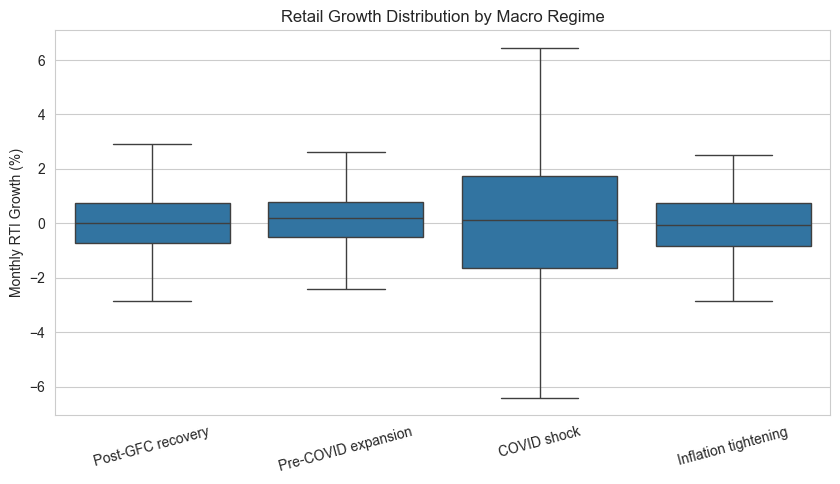

In [5]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=df,
    x="regime",
    y="rti_growth",
    showfliers=False
)
plt.title("Retail Growth Distribution by Macro Regime")
plt.ylabel("Monthly RTI Growth (%)")
plt.xlabel("")
plt.xticks(rotation=15)
plt.show()

Retail volatility is **regime-dependent**, not constant over time.

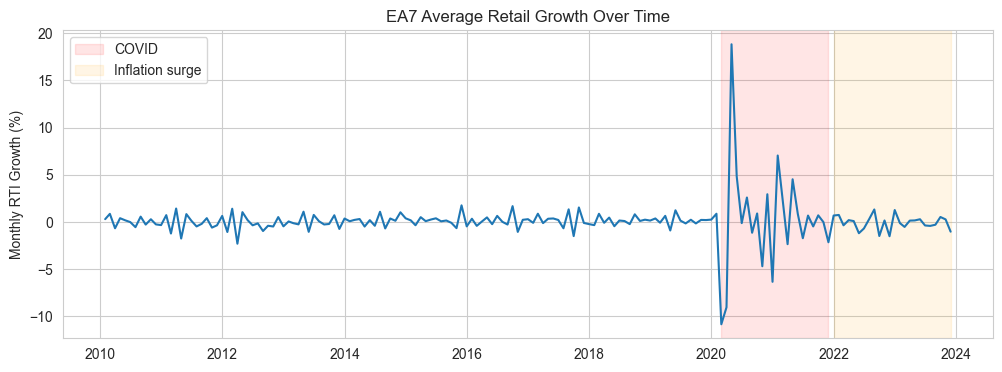

In [6]:
avg = (
    df.groupby("month_dt")
      .agg(rti_growth=("rti_growth","mean"))
      .reset_index()
)

plt.figure(figsize=(12,4))
plt.plot(avg["month_dt"], avg["rti_growth"])
plt.axvspan(pd.Timestamp("2020-03-01"), pd.Timestamp("2021-12-01"),
            color="red", alpha=0.1, label="COVID")
plt.axvspan(pd.Timestamp("2022-01-01"), avg["month_dt"].max(),
            color="orange", alpha=0.1, label="Inflation surge")

plt.title("EA7 Average Retail Growth Over Time")
plt.ylabel("Monthly RTI Growth (%)")
plt.legend()
plt.show()

In [7]:
regime_stats = (
    df.groupby("regime")
      .agg(
          rti_growth=("rti_growth","mean"),
          inflation=("hicp_index","mean"),
          confidence=("cci","mean")
      )
)

(regime_stats - regime_stats.mean()) / regime_stats.std()

,rti_growth,inflation,confidence
regime,,,
COVID shock,1.276839,0.051725,0.477848
Inflation tightening,-0.830351,1.360180,-1.231562
Post-GFC recovery,-0.762003,-0.980267,-0.319877
Pre-COVID expansion,0.315516,-0.431638,1.073590


This highlights **relative regime intensity**, not levels.

## Cell 8 — Interpretation (Markdown)
### Key Findings

**1. Retail growth is highly regime-sensitive**
- Stable during expansions
- Collapses during shocks
- Weakens again during inflation tightening

**2. COVID was a volatility shock**
- Not just a level drop
- Largest dispersion in outcomes

**3. Inflation regime differs structurally**
- Unlike COVID, growth weakens without collapsing
- Confidence deteriorates persistently

**4. Macro regimes matter more than country identity**
- Country effects exist, but regime explains most variation

Notebook 03 showed that **inflation and confidence matter on average.**
Notebook 04 shows **when they matter most.**

The strength and sign of macro effects are **regime-dependent,** not constant.